In [3]:
import numpy as np
import pandas as pd
import loompy
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

/work/rwth1209/enviroments/spage/lib/python3.9/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/work/rwth1209/enviroments/spage/lib/python3.9/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/work/rwth1209/env

In [4]:
import sys
sys.path.insert(0,"/work/rwth1209/projects/integration_merfish_snrna/spage/SpaGE")

In [5]:
from SpaGE.main import SpaGE

In [6]:
RNA_data = pd.read_csv('/work/rwth1209/dana_projects/test_new_imputation_tools/SpaGE/TestDatasets/scRNAseq/Allen_SSp/SSp_exons_matrix.csv',header=0,index_col=0,sep=',')

# filter lowely expressed genes
Genes_count = np.sum(RNA_data > 0, axis=1)
RNA_data = RNA_data.loc[Genes_count >=10,:]
del Genes_count

# Normalization
def Log_Norm_cpm(x):
    return np.log(((x/np.sum(x))*1000000) + 1)
RNA_data = RNA_data.apply(Log_Norm_cpm,axis=0)

In [7]:
RNA_data

,SM-GE8XK_S073_E1-50,SM-GE8XK_S074_E1-50,SM-GE8XK_S075_E1-50,SM-GE8XK_S076_E1-50,SM-GE8XK_S077_E1-50,SM-GE8XK_S078_E1-50,SM-GE8XK_S079_E1-50,SM-GE8XK_S080_E1-50,SM-GE8XK_S081_E1-50,SM-GE8XK_S082_E1-50,...,SM-GE8ZY_S079_E1-50,SM-GE8ZY_S080_E1-50,SM-GE8ZY_S089_E1-50,SM-GE8ZY_S090_E1-50,SM-GE8ZY_S091_E1-50,SM-GE8ZY_S092_E1-50,SM-GE8ZY_S093_E1-50,SM-GE8ZY_S094_E1-50,SM-GE8ZY_S095_E1-50,SM-GE8ZY_S096_E1-50
0610005C13Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610007P14Rik,0.000000,4.611043,4.549197,4.646943,4.546276,3.376159,4.799512,4.363505,5.051342,4.971832,...,4.560759,4.219864,4.409711,5.358608,4.308046,4.730877,4.760620,3.824424,5.078384,4.117247
0610009B22Rik,3.948351,4.179266,4.136931,2.882547,3.976464,3.702818,3.345518,4.986153,4.302875,4.561813,...,4.943070,3.541311,4.321238,4.817284,4.807790,4.394120,4.660434,4.252008,3.641452,4.364935
0610009E02Rik,1.591584,0.000000,2.315251,0.000000,0.000000,0.000000,0.000000,0.961359,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009L18Rik,1.083756,0.000000,0.000000,0.000000,1.713847,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.873791,0.000000,0.000000,0.000000,0.000000,0.000000,2.038857,0.000000,2.276294,2.904400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zzef1,3.023231,1.123230,2.518448,2.994090,3.342920,0.000000,1.867957,4.183727,2.086417,0.000000,...,0.000000,2.925200,2.074921,3.272283,2.876565,0.000000,3.147283,0.000000,1.158493,4.364935
Zzz3,1.591584,4.727721,4.304331,3.901400,2.515734,2.343668,3.717233,4.383864,2.546315,2.326749,...,3.897031,1.839182,3.186892,3.188713,2.988070,4.007989,2.038857,2.213385,0.000000,2.634813
a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
l7Rn6,4.152367,4.815524,4.926615,4.942304,4.018242,4.359768,3.345518,5.221103,3.199489,4.376749,...,4.688113,5.116776,5.007722,5.307562,5.175633,4.046510,5.026868,4.671951,5.091905,5.065410


In [8]:
ds = loompy.connect('/work/rwth1209/dana_projects/test_new_imputation_tools/SpaGE/TestDatasets/Spatial/osmFISH/osmFISH_SScortex_mouse_all_cells.loom')
FISH_Genes = ds.ra['Gene']   
colAtr = ds.ca.keys()

df = pd.DataFrame()
for i in colAtr:
    df[i] = ds.ca[i]

osmFISH_meta = df.iloc[np.where(df.Valid == 1)[0], :]
osmFISH_data = ds[:,:]
osmFISH_data = osmFISH_data[:,np.where(df.Valid == 1)[0]]
osmFISH_data = pd.DataFrame(data= osmFISH_data, index= FISH_Genes)

del ds, colAtr, i, df, FISH_Genes

# Select cortical regions only to match the AllenSSp dataset
Cortex_Regions = ['Layer 2-3 lateral', 'Layer 2-3 medial', 'Layer 3-4', 
                  'Layer 4','Layer 5', 'Layer 6', 'Pia Layer 1']
#corrected added square brackets
Cortical = np.stack([i in Cortex_Regions for i in osmFISH_meta.Region])

osmFISH_meta = osmFISH_meta.iloc[Cortical,:]
osmFISH_data = osmFISH_data.iloc[:,Cortical]
del Cortex_Regions,Cortical

# Normalization
cell_count = np.sum(osmFISH_data,axis=0)
def Log_Norm_spatial(x):
    return np.log(((x/np.sum(x))*np.median(cell_count)) + 1)
osmFISH_data = osmFISH_data.apply(Log_Norm_spatial,axis=0)

In [9]:
osmFISH_data

,0,2,5,7,9,14,16,20,21,22,...,4821,4822,4824,4826,4830,4832,4833,4834,4835,4837
Gad2,2.777385,3.699013,3.663039,3.428742,2.433613,3.735570,3.429677,3.706039,3.540776,3.720908,...,1.658831,1.904237,0.000000,1.684945,2.911226,1.347413,2.627081,1.517174,1.794244,1.904237
Slc32a1,2.926465,3.059924,3.480582,2.682501,3.250374,3.439654,2.598566,3.218876,3.257610,3.664529,...,1.139940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.885307,0.000000,0.000000
Crhbp,0.000000,1.123004,2.220487,0.831733,0.000000,1.562770,0.483797,0.000000,0.724302,1.624419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cnr1,1.390133,0.346999,0.521361,1.279431,2.282382,2.462640,1.249583,1.877702,1.552131,1.709881,...,1.998739,0.762140,0.000000,1.161925,0.000000,0.000000,2.442347,0.885307,2.400605,0.762140
Vip,0.829559,0.604114,0.862314,0.499956,0.955511,0.457622,1.887070,2.230841,1.843158,0.373514,...,1.658831,1.189584,2.879198,1.457246,2.464587,1.347413,2.442347,1.142818,1.794244,1.189584
Cpne5,2.119032,0.346999,0.000000,0.000000,0.000000,1.108922,0.000000,2.009762,0.000000,0.000000,...,1.139940,1.189584,0.000000,1.161925,0.000000,1.347413,0.000000,0.000000,1.254893,1.189584
Pthlh,0.000000,0.346999,1.222337,1.184873,0.000000,0.000000,1.249583,0.000000,1.139940,0.858022,...,0.000000,0.000000,0.000000,0.000000,0.976510,0.000000,0.000000,0.885307,0.000000,0.000000
Crh,0.621403,0.808458,0.521361,0.000000,0.000000,0.000000,0.808458,0.000000,0.000000,0.373514,...,0.000000,0.000000,0.000000,2.161744,0.976510,1.901348,0.000000,1.901348,1.254893,0.000000
Tbr1,2.536136,1.462912,2.143296,3.079924,1.223775,2.145234,2.768413,2.633548,1.998739,0.858022,...,2.251958,3.306363,2.879198,2.026599,2.865152,3.383528,2.079442,3.497534,2.605450,3.306363
Lamp5,1.492039,0.000000,0.000000,0.963793,4.506454,2.943893,0.808458,3.142161,0.426343,0.644829,...,4.067619,3.306363,0.000000,3.308824,0.976510,3.900088,0.000000,0.000000,4.113806,3.306363


In [10]:
osmFISH_data.T.drop('Lamp5',axis=1)

,Gad2,Slc32a1,Crhbp,Cnr1,Vip,Cpne5,Pthlh,Crh,Tbr1,Rorb,...,Ctps,Anln,Mrc1,Hexb,Ttr,Foxj1,Vtn,Flt1,Apln,Acta2
0,2.777385,2.926465,0.000000,1.390133,0.829559,2.119032,0.000000,0.621403,2.536136,0.829559,...,2.009762,1.276651,1.001762,2.065889,1.001762,0.829559,0.621403,0.000000,1.001762,0.829559
2,3.699013,3.059924,1.123004,0.346999,0.604114,0.346999,0.346999,0.808458,1.462912,0.978048,...,1.123004,0.808458,0.346999,0.808458,0.346999,0.346999,0.604114,0.000000,0.978048,0.346999
5,3.663039,3.480582,2.220487,0.521361,0.862314,0.000000,1.222337,0.521361,2.143296,0.000000,...,0.997242,0.862314,0.706299,2.256957,0.294279,0.862314,0.997242,0.000000,0.521361,0.706299
7,3.428742,2.682501,0.831733,1.279431,0.499956,0.000000,1.184873,0.000000,3.079924,1.184873,...,1.279431,0.000000,0.963793,1.587579,0.963793,0.280902,0.280902,0.000000,0.280902,0.963793
9,2.433613,3.250374,0.000000,2.282382,0.955511,0.000000,0.000000,0.000000,1.223775,0.000000,...,1.435085,0.587787,0.955511,1.223775,0.587787,0.587787,0.587787,0.587787,1.223775,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,1.347413,0.000000,0.000000,0.000000,1.347413,1.347413,0.000000,1.901348,3.383528,2.255742,...,2.516876,0.000000,2.255742,0.000000,0.000000,0.000000,0.000000,0.000000,1.347413,2.255742
4833,2.627081,0.000000,0.000000,2.442347,2.442347,0.000000,0.000000,0.000000,2.079442,0.000000,...,1.504077,1.921813,1.203973,0.773190,0.773190,0.000000,2.215574,1.504077,0.773190,3.957634
4834,1.517174,0.885307,0.000000,0.885307,1.142818,0.000000,0.885307,1.901348,3.497534,0.537583,...,1.347413,1.517174,3.334019,0.537583,2.094163,1.517174,0.885307,0.000000,1.517174,3.074731
4835,1.794244,0.000000,0.000000,2.400605,1.794244,1.254893,0.000000,1.254893,2.605450,1.254893,...,1.254893,1.254893,0.000000,0.000000,1.254893,0.000000,0.000000,0.000000,1.794244,2.605450


In [11]:
RNA_data.T

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,...,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,n-R5s136
SM-GE8XK_S073_E1-50,0.0,0.000000,3.948351,1.591584,1.083756,0.000000,3.909901,2.812175,2.377582,4.756946,...,3.909901,1.591584,2.544320,3.274306,3.909901,3.023231,1.591584,0.0,4.152367,0.0
SM-GE8XK_S074_E1-50,0.0,4.611043,4.179266,0.000000,0.000000,3.079508,4.781322,3.402756,0.000000,5.026891,...,0.000000,0.000000,3.842565,5.040408,4.113630,1.123230,4.727721,0.0,4.815524,0.0
SM-GE8XK_S075_E1-50,0.0,4.549197,4.136931,2.315251,0.000000,0.000000,3.170469,2.518448,1.716269,4.892964,...,0.000000,1.188412,0.000000,2.687248,0.000000,2.518448,4.304331,0.0,4.926615,0.0
SM-GE8XK_S076_E1-50,0.0,4.646943,2.882547,0.000000,0.000000,2.882547,1.990937,4.021667,0.000000,5.239439,...,0.000000,0.000000,4.517660,4.911755,0.000000,2.994090,3.901400,0.0,4.942304,0.0
SM-GE8XK_S077_E1-50,0.0,4.546276,3.976464,0.000000,1.713847,2.515734,4.361245,0.000000,3.167640,4.638423,...,0.000000,0.000000,0.000000,2.828848,2.954967,3.342920,2.515734,0.0,4.018242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SM-GE8ZY_S092_E1-50,0.0,4.730877,4.394120,0.000000,0.000000,1.151028,4.446131,2.266519,4.046510,4.952256,...,0.000000,0.000000,1.672015,3.837090,2.266519,0.000000,4.007989,0.0,4.046510,0.0
SM-GE8ZY_S093_E1-50,0.0,4.760620,4.660434,0.000000,2.038857,0.000000,3.997368,4.113108,3.955606,5.150399,...,0.000000,0.000000,3.238680,3.471403,4.113108,3.147283,2.038857,0.0,5.026868,0.0
SM-GE8ZY_S094_E1-50,0.0,3.824424,4.252008,0.000000,0.000000,2.414420,4.161011,4.025168,3.628593,4.994772,...,0.000000,1.623994,0.000000,4.025168,4.571849,0.000000,2.213385,0.0,4.671951,0.0
SM-GE8ZY_S095_E1-50,0.0,5.078384,3.641452,0.000000,2.276294,0.000000,1.680876,4.094319,3.582464,5.022392,...,0.000000,0.000000,0.000000,3.800031,3.129007,1.158493,0.000000,0.0,5.091905,0.0


In [12]:
osmFISH_meta['X']

0       18171.230942
2       11247.433715
5       18374.295796
7        4197.789280
9        3757.866349
            ...     
4832    11457.806019
4833     9214.047907
4834     4476.301656
4835    18796.948664
4837      884.041752
Name: X, Length: 3405, dtype: float64

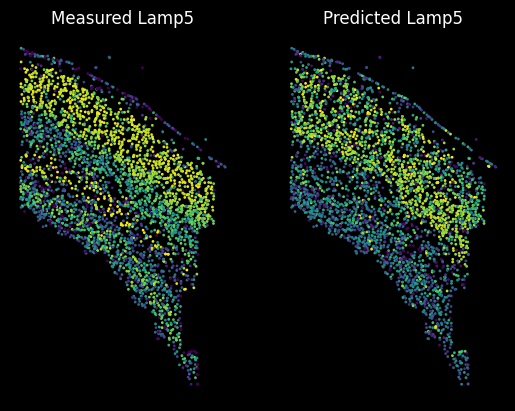

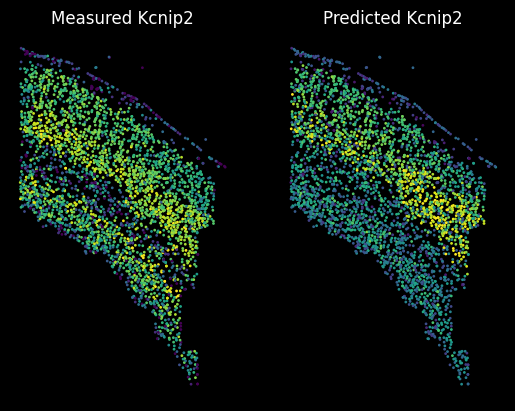

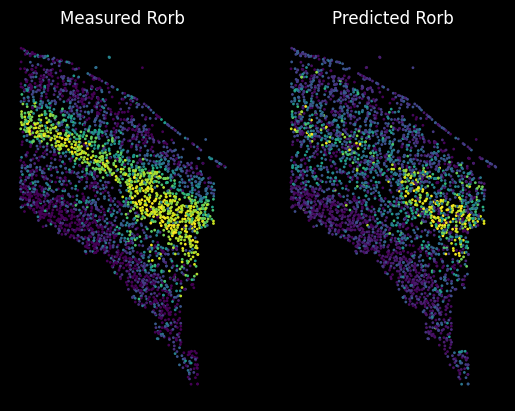

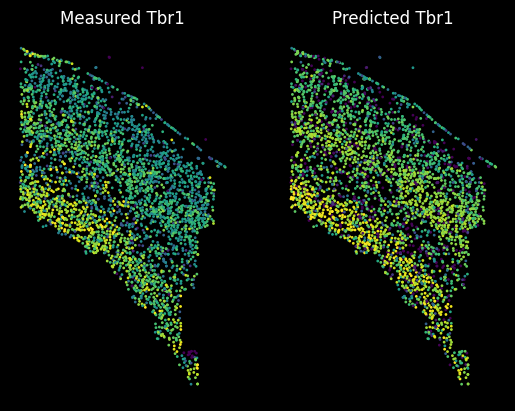

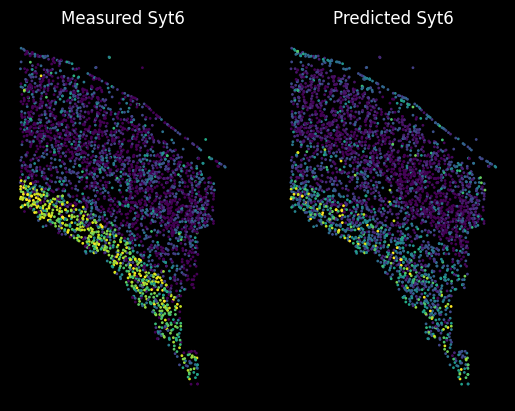

In [13]:
### Leave-one-gene-out cross validation for Lamp5, Kcnip2, Rorb, Tbr1 and Syt6
Gene_set = ['Lamp5','Kcnip2','Rorb','Tbr1','Syt6']
Correlations = pd.Series(index = Gene_set)
plt.style.use('dark_background')

for i in Gene_set:
    Imp_Genes = SpaGE(osmFISH_data.T.drop(i,axis=1),RNA_data.T,n_pv=30,
                           genes_to_predict = [i])
    Correlations[i] = st.spearmanr(osmFISH_data.T[i],Imp_Genes[i])[0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.axis('off')
    cmap = osmFISH_data.T[i]
    cmap[cmap > np.percentile(cmap,99)] = np.percentile(cmap,99)
    ax1.scatter(osmFISH_meta['X'],osmFISH_meta['Y'],s=1,c=cmap)
    ax1.set_title('Measured ' + i, fontsize = 12)
    ax1.set_ylabel(i)
    
    ax2.axis('off')
    cmap = Imp_Genes[i]
    cmap[cmap > np.percentile(cmap,99)] = np.percentile(cmap,99)
    ax2.scatter(osmFISH_meta['X'],osmFISH_meta['Y'],s=1,c=cmap)
    ax2.set_title('Predicted ' + i, fontsize = 12)

In [14]:
osmFISH_meta

,CellID,ClusterID,ClusterName,Region,Total_molecules,Valid,X,Y,_tSNE_1,_tSNE_2,size_pix,size_um2
0,778,18,Inhibitory CP,Layer 6,390,1,18171.230942,24590.795275,-58.132385,5.219181,60911.0,257.348975
2,3642,18,Inhibitory CP,Layer 4,405,1,11247.433715,36626.892415,-61.572853,-1.185364,44143.0,186.504175
5,769,18,Inhibitory CP,Layer 4,491,1,18374.295796,26286.856654,-66.862244,-1.766500,41014.0,173.284150
7,5870,18,Inhibitory CP,Layer 4,518,1,4197.789280,39465.355903,-59.923431,-3.739808,42376.0,179.038600
9,5682,18,Inhibitory CP,Layer 2-3 medial,210,1,3757.866349,46281.167166,-64.769470,5.166343,23922.0,101.070450
...,...,...,...,...,...,...,...,...,...,...,...,...
4832,3635,25,Vascular Smooth Muscle,Layer 3-4,59,1,11457.806019,38036.523162,-12.763592,7.068469,7993.0,33.770425
4833,3336,25,Vascular Smooth Muscle,Pia Layer 1,144,1,9214.047907,45314.585476,0.060634,30.242371,14865.0,62.804625
4834,6462,25,Vascular Smooth Muscle,Layer 6,236,1,4476.301656,31097.786260,3.578825,28.862700,24835.0,104.927875
4835,260,25,Vascular Smooth Muscle,Layer 2-3 lateral,67,1,18796.948664,36603.475262,-11.011883,5.821001,8873.0,37.488425


In [15]:
print(Correlations)

Lamp5     0.412915
Kcnip2    0.419512
Rorb      0.497496
Tbr1      0.543648
Syt6      0.379520
dtype: float64


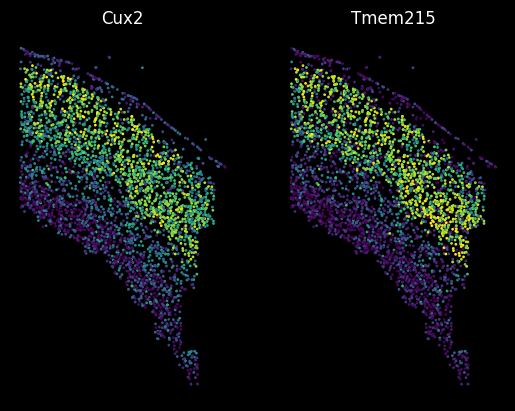

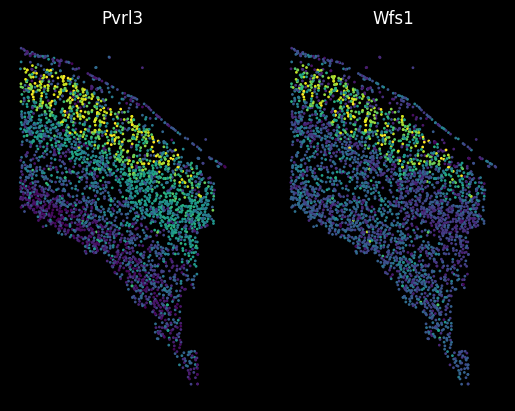

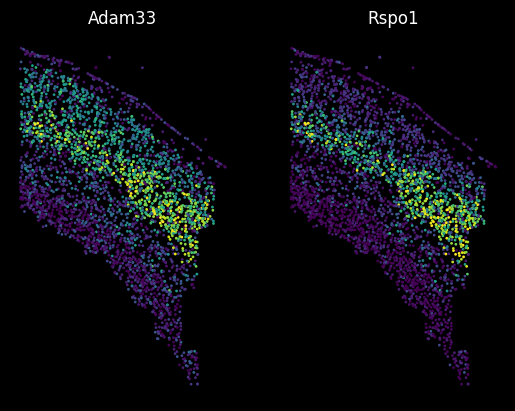

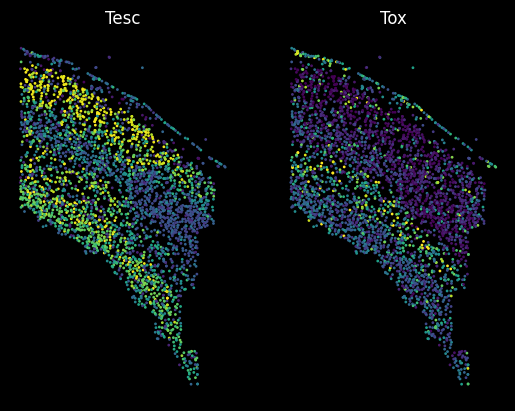

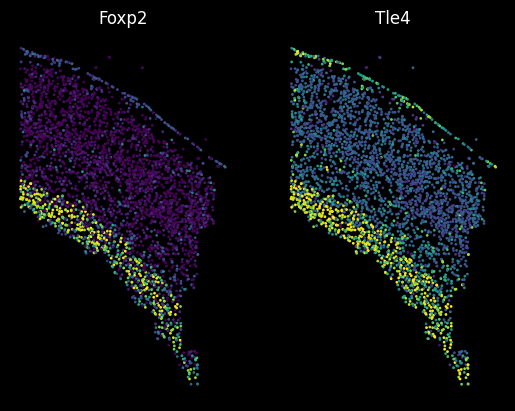

In [16]:
new_genes = ['Cux2','Tmem215','Pvrl3','Wfs1','Adam33','Rspo1','Tesc','Tox','Foxp2','Tle4']
Imp_New_Genes = SpaGE(osmFISH_data.T,RNA_data.T,n_pv=30,
                           genes_to_predict = new_genes)

for i in [0,2,4,6,8]:
    fig,(ax1, ax2) = plt.subplots(1,2)
    ax1.axis('off')
    cmap = Imp_New_Genes[new_genes[i]]
    cmap[cmap > np.percentile(cmap,99)] = np.percentile(cmap,99)
    ax1.scatter(osmFISH_meta['X'],osmFISH_meta['Y'],s=1,c=cmap)
    ax1.set_title(new_genes[i], fontsize = 12)
    
    ax2.axis('off')
    cmap = Imp_New_Genes[new_genes[i+1]]
    cmap[cmap > np.percentile(cmap,99)] = np.percentile(cmap,99)
    ax2.scatter(osmFISH_meta['X'],osmFISH_meta['Y'],s=1,c=cmap)
    ax2.set_title(new_genes[i+1], fontsize = 12)

In [17]:
osmFISH_data

,0,2,5,7,9,14,16,20,21,22,...,4821,4822,4824,4826,4830,4832,4833,4834,4835,4837
Gad2,2.777385,3.699013,3.663039,3.428742,2.433613,3.735570,3.429677,3.706039,3.540776,3.720908,...,1.658831,1.904237,0.000000,1.684945,2.911226,1.347413,2.627081,1.517174,1.794244,1.904237
Slc32a1,2.926465,3.059924,3.480582,2.682501,3.250374,3.439654,2.598566,3.218876,3.257610,3.664529,...,1.139940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.885307,0.000000,0.000000
Crhbp,0.000000,1.123004,2.220487,0.831733,0.000000,1.562770,0.483797,0.000000,0.724302,1.624419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cnr1,1.390133,0.346999,0.521361,1.279431,2.282382,2.462640,1.249583,1.877702,1.552131,1.709881,...,1.998739,0.762140,0.000000,1.161925,0.000000,0.000000,2.442347,0.885307,2.400605,0.762140
Vip,0.829559,0.604114,0.862314,0.499956,0.955511,0.457622,1.887070,2.230841,1.843158,0.373514,...,1.658831,1.189584,2.879198,1.457246,2.464587,1.347413,2.442347,1.142818,1.794244,1.189584
Cpne5,2.119032,0.346999,0.000000,0.000000,0.000000,1.108922,0.000000,2.009762,0.000000,0.000000,...,1.139940,1.189584,0.000000,1.161925,0.000000,1.347413,0.000000,0.000000,1.254893,1.189584
Pthlh,0.000000,0.346999,1.222337,1.184873,0.000000,0.000000,1.249583,0.000000,1.139940,0.858022,...,0.000000,0.000000,0.000000,0.000000,0.976510,0.000000,0.000000,0.885307,0.000000,0.000000
Crh,0.621403,0.808458,0.521361,0.000000,0.000000,0.000000,0.808458,0.000000,0.000000,0.373514,...,0.000000,0.000000,0.000000,2.161744,0.976510,1.901348,0.000000,1.901348,1.254893,0.000000
Tbr1,2.536136,1.462912,2.143296,3.079924,1.223775,2.145234,2.768413,2.633548,1.998739,0.858022,...,2.251958,3.306363,2.879198,2.026599,2.865152,3.383528,2.079442,3.497534,2.605450,3.306363
Lamp5,1.492039,0.000000,0.000000,0.963793,4.506454,2.943893,0.808458,3.142161,0.426343,0.644829,...,4.067619,3.306363,0.000000,3.308824,0.976510,3.900088,0.000000,0.000000,4.113806,3.306363


In [18]:
RNA_data.var

<bound method DataFrame.var of                SM-GE8XK_S073_E1-50  SM-GE8XK_S074_E1-50  SM-GE8XK_S075_E1-50  \
0610005C13Rik             0.000000             0.000000             0.000000   
0610007P14Rik             0.000000             4.611043             4.549197   
0610009B22Rik             3.948351             4.179266             4.136931   
0610009E02Rik             1.591584             0.000000             2.315251   
0610009L18Rik             1.083756             0.000000             0.000000   
...                            ...                  ...                  ...   
Zzef1                     3.023231             1.123230             2.518448   
Zzz3                      1.591584             4.727721             4.304331   
a                         0.000000             0.000000             0.000000   
l7Rn6                     4.152367             4.815524             4.926615   
n-R5s136                  0.000000             0.000000             0.000000   

        